<a href="https://colab.research.google.com/github/Bertha-ding/20MA573-yuning-ding/blob/master/src/pro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yahoo-finance
!pip install pandas_market_calendars

import pandas as pd
import pandas_market_calendars as pmc
import pandas_datareader.data as drd
import numpy as np
import seaborn as sns

     |████████████████████████████████| 92kB 2.9MB/s 
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-cp36-none-any.whl size=7232 sha256=08c3c5c700bdc1d8a5ebbd9a7706cc94bb3aa4d627df0b43ef7395406e9a0b16
  Stored in directory: /root/.cache/pip/wheels/58/77/5b/66026e0fa7af2ee5926a516a70d3df95e17f952c570bc5aee6
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114207 sha256=0530d73502885ac1be695a3d4fd41b75ef903cc8d72851c79031bb002cc09d0e
  Stored in directory: /root/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built yahoo-finance simplejson
     |████████████████████████████████| 51kB 1.7MB/s 


In [0]:
AAPL= drd.get_data_yahoo('AAPL','01/01/2012','12/31/2019',interval='d')
TSLA= drd.get_data_yahoo('TSLA','01/01/2012','12/31/2019',interval='d')
GILD= drd.get_data_yahoo('GILD','01/01/2012','12/31/2019',interval='d')
MELI= drd.get_data_yahoo('MELI','01/01/2012','12/31/2019',interval='d')
MSFT= drd.get_data_yahoo('MSFT','01/01/2012','12/31/2019',interval='d')
DIS= drd.get_data_yahoo('DIS','01/01/2012','12/31/2019',interval='d')
NVDA= drd.get_data_yahoo('NVDA','01/01/2012','12/31/2019',interval='d')
TCO= drd.get_data_yahoo('TCO','01/01/2012','12/31/2019',interval='d')
MMM= drd.get_data_yahoo('MMM','01/01/2012','12/31/2019',interval='d')
INCY= drd.get_data_yahoo('INCY','01/01/2012','12/31/2019',interval='d')
IBM= drd.get_data_yahoo('IBM','01/01/2012','12/31/2019',interval='d')
EPC= drd.get_data_yahoo('EPC','01/01/2012','12/31/2019',interval='d')
SPY= drd.get_data_yahoo('SPY','01/01/2012','12/31/2019',interval='d')
VEA= drd.get_data_yahoo('VEA','01/01/2012','12/31/2019',interval='d')
VTI= drd.get_data_yahoo('VTI','01/01/2012','12/31/2019',interval='d')

In [0]:
stock_list=[AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,VEA,VTI]
log_return=[]
for i in range(15):
  stock_log=np.log(stock_list[i]['Adj Close'])#log close price of each stock
  len_num=len(stock_log)
  for j in range(len_num-1):
    stock_log[j]=stock_log[j+1]-stock_log[j]
  log_return.append(stock_log)
log_return

In [4]:
type(log_return[0])

pandas.core.series.Series

Now we work on 1.2

In [5]:
import pandas_market_calendars as mcal
nyse = mcal.get_calendar('NYSE')
tradingdays = nyse.schedule(start_date='2012-01-01', end_date='2019-12-31')
tradingdays

,market_open,market_close
2012-01-03,2012-01-03 14:30:00+00:00,2012-01-03 21:00:00+00:00
2012-01-04,2012-01-04 14:30:00+00:00,2012-01-04 21:00:00+00:00
2012-01-05,2012-01-05 14:30:00+00:00,2012-01-05 21:00:00+00:00
2012-01-06,2012-01-06 14:30:00+00:00,2012-01-06 21:00:00+00:00
2012-01-09,2012-01-09 14:30:00+00:00,2012-01-09 21:00:00+00:00
...,...,...
2019-12-24,2019-12-24 14:30:00+00:00,2019-12-24 18:00:00+00:00
2019-12-26,2019-12-26 14:30:00+00:00,2019-12-26 21:00:00+00:00
2019-12-27,2019-12-27 14:30:00+00:00,2019-12-27 21:00:00+00:00
2019-12-30,2019-12-30 14:30:00+00:00,2019-12-30 21:00:00+00:00


In [6]:
from datetime import date
total_num=len(tradingdays)#tradingdays的天数
date_list=[]
for i in range(total_num-1):
  if tradingdays.index[i].day > tradingdays.index[i+1].day:#为什么是大于 筛选月末
    date_list.append(tradingdays.index[i])#将每年月末放入date_list到2019-11-30
date_list.append(tradingdays.index[2011])#将2019-12-31放入date_list
a=date_list[0]#2012-1-31

AAPL
stock_list[0].loc[a]['Adj Close']#aapl 2012-1-31的股价

56.60617446899414

In [0]:
date_list#datelist 月末的list

In [29]:
index_list=['AAPL','TSLA','GILD','MELI','MSFT','DIS','NVDA','TCO','MMM','INCY','IBM','EPC','SPY','VEA','VTI']

def new_portfolio():#建立一个函数形成新的股票的share和price的dataframe
    res = pd.DataFrame(columns=['Share', 'Adj Close'],index=pd.Series(index_list))
    return res

my_port = new_portfolio()#my_port就是portfolio
my_port

,Share,Adj Close
AAPL,NaN,NaN
TSLA,NaN,NaN
GILD,NaN,NaN
MELI,NaN,NaN
MSFT,NaN,NaN
DIS,NaN,NaN
NVDA,NaN,NaN
TCO,NaN,NaN
MMM,NaN,NaN
INCY,NaN,NaN


In [31]:
update_list=[]#更新

for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc['2012-01-03']['Adj Close']#port里每只股票的收盘价=每只股票2012-1-3的收盘价
update_list.append(my_port)#因为一月份持股为1.3的持股数

for j in range(len(date_list)):
  b=date_list[j]#月末的list
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']#port里每只股票的收盘价=每只股票月末的收盘价
  update_list.append(my_port)


,Share,Adj Close
AAPL,NaN,50.9949
TSLA,NaN,28.08
GILD,NaN,18.165
MELI,NaN,79.6148
MSFT,NaN,22.0208
DIS,NaN,34.3006
NVDA,NaN,12.9221
TCO,NaN,45.5826
MMM,NaN,67.2184
INCY,NaN,14.99


In [33]:
len(update_list)

97

In [0]:
for i in range(len(index_list)):
    a=index_list[i]
    update_list[0].loc[a]['Share']=(400000/15)/update_list[0].loc[a]['Adj Close']

def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a]['Share']*portfolio2.loc[a]['Adj Close']
  return res

for i in range(len(update_list)-1):#0-95
  to_value=total_value(update_list[i],update_list[i+1])
  for j in range(len(index_list)):
    a=index_list[j]
    update_list[i+1].loc[a]['Share']=(to_value/15)/update_list[i+1].loc[a]['Adj Close']#算新share



Now we work on 1.3

In [10]:
time_window=tradingdays.index
time_window

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20',
               '2019-12-23', '2019-12-24', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=2012, freq='C')

In [0]:
date_list[:6]
def total_value(portfolio1,portfolio2):
  res=0
  for i in range(len(index_list)):
    a=index_list[i]
    res+=portfolio1.loc[a]['Share']*portfolio2.loc[a]['Adj Close']
  return res

In [0]:
allstock_list=[]
for j in range(len(time_window)):
  b=time_window[j]
  my_port=new_portfolio()
  for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc[b]['Adj Close']
  allstock_list.append(my_port)


In [39]:
date_list[0]
update_list[0]#2012-1-3
update_list[1]#2012-1-31

,Share,Adj Close
AAPL,NaN,56.6062
TSLA,NaN,29.07
GILD,NaN,21.2027
MELI,NaN,85.0652
MSFT,NaN,24.2911
DIS,NaN,34.8289
NVDA,NaN,13.594
TCO,NaN,48.9412
MMM,NaN,69.8109
INCY,NaN,17.7


In [0]:
j=0
value_series=[]
for i in range(len(time_window)):
  if time_window[i] < date_list[j]:
    a=total_value(update_list[j],allstock_list[i])
    value_series.append(a)
  else:
    j+=1
    a=total_value(update_list[j],allstock_list[i])
    value_series.append(a)

#value_series

In [0]:
logvalue_series=np.log(np.array(value_series))
logret_series=[]
for i in range(len(logvalue_series)-1):
  logret_series.append(logvalue_series[i+1]-logvalue_series[i])#logreturn series
  
#logret_series

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


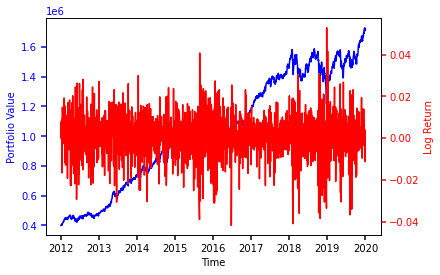

In [15]:
import matplotlib.pyplot as plt

logret_series.insert(0,0) 

fig,left_axis=plt.subplots()
right_axis = left_axis.twinx()
p1, = left_axis.plot(time_window, value_series,'b')
p2, = right_axis.plot(time_window,logret_series,'r')

left_axis.set_xlabel('Time')
left_axis.set_ylabel('Portfolio Value')
right_axis.set_ylabel('Log Return')


left_axis.yaxis.label.set_color(p1.get_color())
right_axis.yaxis.label.set_color(p2.get_color())

tkw = dict(size=5, width=1.5)
left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)
right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)
left_axis.tick_params(axis='x', **tkw)

plt.show()

In [16]:
'''
my_port=new_portfolio()
for i in range(len(index_list)):
    a=index_list[i]
    my_port.loc[a]['Adj Close']=stock_list[i].loc['2014-05-28']['Adj Close']
my_port
'''

"\nmy_port=new_portfolio()\nfor i in range(len(index_list)):\n    a=index_list[i]\n    my_port.loc[a]['Adj Close']=stock_list[i].loc['2014-05-28']['Adj Close']\nmy_port\n"

Now we work on 2.1

In [17]:
four_year1=[]
for i in time_window:
  if i.year < 2016:
    four_year1.append(i)
#four_year1
len(four_year1)

1006

In [18]:
u=[]
for i in range(15):
  a=log_return[i][:1005]
  u.append(a.mean())
u

[0.000651307449392186,
 0.0021349482485699574,
 0.0015797717851378486,
 0.00035364876830305727,
 0.0008361326272778298,
 0.00105605906408247,
 0.00091106047752495,
 0.00031750836162060606,
 0.000685530844762954,
 0.001969060609241371,
 -0.00020214014350277264,
 0.00034285946574331256,
 0.0005483261772205701,
 0.00027445871906183345,
 0.0005458413382885153]

In [19]:
df_temp={}

for i in range(15):
  df_temp[index_list[i]]=log_return[i][:1005]
df = pd.DataFrame(df_temp)
cov_mat=df.cov()  
cov_mat

,AAPL,TSLA,GILD,MELI,MSFT,DIS,NVDA,TCO,MMM,INCY,IBM,EPC,SPY,VEA,VTI
AAPL,0.000285,0.000103,0.000061,0.000087,0.000072,0.000056,0.000082,0.000042,0.000055,0.000082,0.000058,0.000051,0.000065,0.000061,0.000066
TSLA,0.000103,0.001102,0.000140,0.000219,0.000098,0.000095,0.000121,0.000055,0.000082,0.000207,0.000072,0.000090,0.000092,0.000089,0.000098
GILD,0.000061,0.000140,0.000384,0.000116,0.000068,0.000076,0.000079,0.000051,0.000067,0.000220,0.000050,0.000071,0.000076,0.000072,0.000078
MELI,0.000087,0.000219,0.000116,0.000587,0.000087,0.000095,0.000134,0.000053,0.000085,0.000182,0.000076,0.000080,0.000095,0.000104,0.000100
MSFT,0.000072,0.000098,0.000068,0.000087,0.000218,0.000069,0.000106,0.000042,0.000063,0.000083,0.000072,0.000056,0.000070,0.000068,0.000070
DIS,0.000056,0.000095,0.000076,0.000095,0.000069,0.000146,0.000082,0.000049,0.000060,0.000100,0.000049,0.000055,0.000065,0.000066,0.000066
NVDA,0.000082,0.000121,0.000079,0.000134,0.000106,0.000082,0.000323,0.000049,0.000071,0.000099,0.000068,0.000059,0.000076,0.000074,0.000078
TCO,0.000042,0.000055,0.000051,0.000053,0.000042,0.000049,0.000049,0.000131,0.000043,0.000082,0.000037,0.000042,0.000045,0.000047,0.000046
MMM,0.000055,0.000082,0.000067,0.000085,0.000063,0.000060,0.000071,0.000043,0.000096,0.000083,0.000053,0.000055,0.000060,0.000064,0.000060
INCY,0.000082,0.000207,0.000220,0.000182,0.000083,0.000100,0.000099,0.000082,0.000083,0.000978,0.000062,0.000090,0.000099,0.000093,0.000106


In [0]:
from scipy.stats import multivariate_normal

loss_appx=np.zeros(5000)
linloss_appx=np.zeros(5000)
loss=0
linloss=0
for i in range(5000):
  loss=0
  linloss=0
  var = np.random.multivariate_normal(mean=u, cov=cov_mat)
  for j in range(len(index_list)):
    a=index_list[j]
    linloss+=update_list[-1].loc[a]['Share']*update_list[-1].loc[a]['Adj Close']*var[j]
    loss+=update_list[-1].loc[a]['Share']*update_list[-1].loc[a]['Adj Close']*(np.exp(var[j])-1)
  linloss_appx[i]=-linloss
  loss_appx[i]=-loss

#linloss_appx
#loss_appx

In [0]:
def pdf_function(loss):
  sns.distplot(linloss_appx)

In [22]:
pdf_function(loss_appx,'loss pdf')

TypeError: ignored

In [0]:
pdf_function(linloss_appx)

In [0]:
def cdf_function(loss,title_name):
  ser = pd.Series(loss)
  ser = ser.sort_values()
  ser[len(ser)] = ser.iloc[-1]
  cum_dist = np.linspace(0.,1.,len(ser))
  ser_cdf = pd.Series(cum_dist, index=ser)
  ser_cdf.plot(drawstyle='steps',title=title_name)

In [0]:
cdf_function(loss_appx,'loss cdf')

In [0]:
cdf_function(linloss_appx,'linearized loss cdf')